In [ ]:
print('CypherAk007')

CypherAk007


In [ ]:
# Upgrade the pandas_datareader for reading stock price value

In [ ]:
! pip install --upgrade pandas
! pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #Use Specific style 

In [ ]:
web.__version__

'0.10.0'

In [ ]:
# Get the stock quote yy/mm/dd
df = web.DataReader('AAPL',data_source='yahoo',start = '2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519277
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859331
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.316818
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.485817
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.389565


In [ ]:
df.shape

(2003, 6)

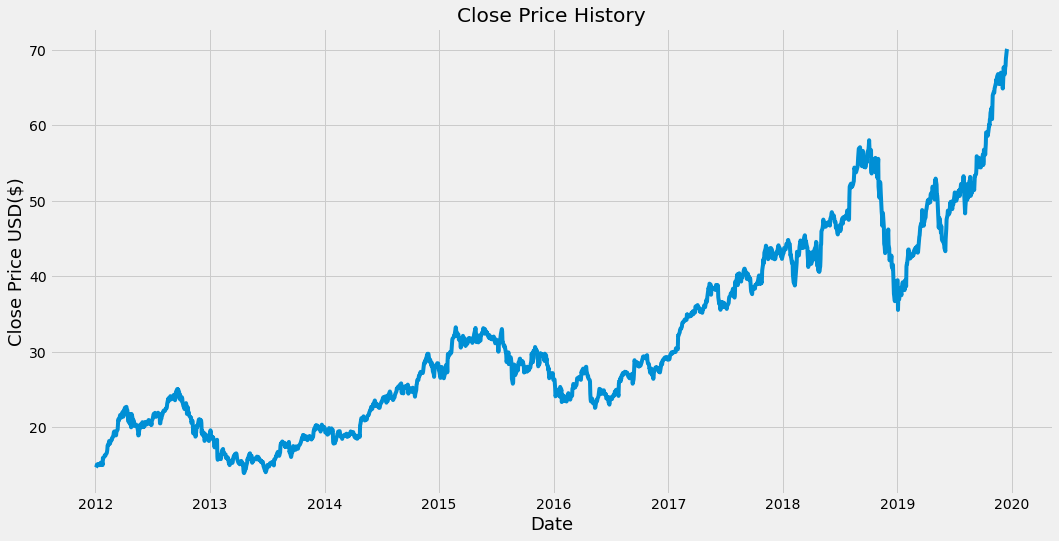

In [ ]:
# Data Visualization for the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize =18)
plt.ylabel('Close Price USD($)',fontsize= 18)
plt.show()

In [ ]:
# Create a new dataFrame  with only the close column
data = df.filter(['Close'])
print(data)
# convert the dataframe to a numpy array
dataset  = data.values
print(dataset)
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

                Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786
...               ...
2019-12-11  67.692497
2019-12-12  67.864998
2019-12-13  68.787498
2019-12-16  69.964996
2019-12-17  70.102501

[2003 rows x 1 columns]
[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


1603

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
# create the training data set
# create teh scaler training data set
train_data = scaled_data[0:training_data_len,:] #[rowstart:rowend,no.Of columns]
print(train_data.shape)
# Split teh data into X_train and Y_train 
x_train=[]
y_train=[]
# First 60 values are in xtrain and 61st val is ytrain(we want the model to predict)
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0]) 
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

(1603, 1)
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.0236

In [ ]:
# convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train)
print(y_train)

[[0.01316509 0.01457063 0.01748985 ... 0.13766105 0.14243103 0.14442805]
 [0.01457063 0.01748985 0.02026915 ... 0.14243103 0.14442805 0.13949272]
 [0.01748985 0.02026915 0.01984303 ... 0.14442805 0.13949272 0.13293563]
 ...
 [0.52177011 0.51927696 0.51669488 ... 0.5857448  0.59767603 0.5912207 ]
 [0.51927696 0.51669488 0.51322235 ... 0.59767603 0.5912207  0.58926183]
 [0.51669488 0.51322235 0.51958863 ... 0.5912207  0.58926183 0.58164901]]
[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


In [ ]:
x_train.shape

(1543, 60, 1)

In [ ]:
# lstm needs array in form of 3d ie.[no.of samples,no.time steps,no. of features]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)
x_train


(1543, 60, 1)


array([[[0.01316509],
        [0.01457063],
        [0.01748985],
        ...,
        [0.13766105],
        [0.14243103],
        [0.14442805]],

       [[0.01457063],
        [0.01748985],
        [0.02026915],
        ...,
        [0.14243103],
        [0.14442805],
        [0.13949272]],

       [[0.01748985],
        [0.02026915],
        [0.01984303],
        ...,
        [0.14442805],
        [0.13949272],
        [0.13293563]],

       ...,

       [[0.52177011],
        [0.51927696],
        [0.51669488],
        ...,
        [0.5857448 ],
        [0.59767603],
        [0.5912207 ]],

       [[0.51927696],
        [0.51669488],
        [0.51322235],
        ...,
        [0.59767603],
        [0.5912207 ],
        [0.58926183]],

       [[0.51669488],
        [0.51322235],
        [0.51958863],
        ...,
        [0.5912207 ],
        [0.58926183],
        [0.58164901]]])

In [ ]:
# model.add(keras.layers.LSTM(units=3, input_shape=(2,10), return_sequences=False))
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1) )) 
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)


1543/1543 [==============================] - 46s 28ms/step - loss: 8.0887e-04


In [ ]:
# create the testing data set
# create a new array contining scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , : ] #[1543:2003,all columns(:)]
# create the data sets x_test and Y_test
x_test=[]
y_test =dataset [training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
# convert the data to numpy array
x_test = np.array(x_test)
x_test

array([[0.51322235, 0.51958863, 0.53294452, ..., 0.58926183, 0.58164901,
        0.58939538],
       [0.51958863, 0.53294452, 0.54839284, ..., 0.58164901, 0.58939538,
        0.5840976 ],
       [0.53294452, 0.54839284, 0.54581069, ..., 0.58939538, 0.5840976 ,
        0.58107023],
       ...,
       [0.7353308 , 0.72095091, 0.72535838, ..., 0.94688811, 0.95708301,
        0.96015487],
       [0.72095091, 0.72535838, 0.7207283 , ..., 0.95708301, 0.96015487,
        0.97658263],
       [0.72535838, 0.7207283 , 0.7356424 , ..., 0.96015487, 0.97658263,
        0.99755134]])

In [ ]:
# RESHAPE FOR LSTM 3D
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# GET MODEL PREDICTED PRICE VALUES
# we are unscaling the values so that predictions contain the same values as Y_test contains
predicitons = model.predict(x_test)
predictions = scaler.inverse_transform(predicitons)

13/13 [==============================] - 1s 17ms/step


In [ ]:
# Get the root mean squred error(RMSE) evaLVATE THE MODEL
# o/p=>0 very good
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.489524038805374

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


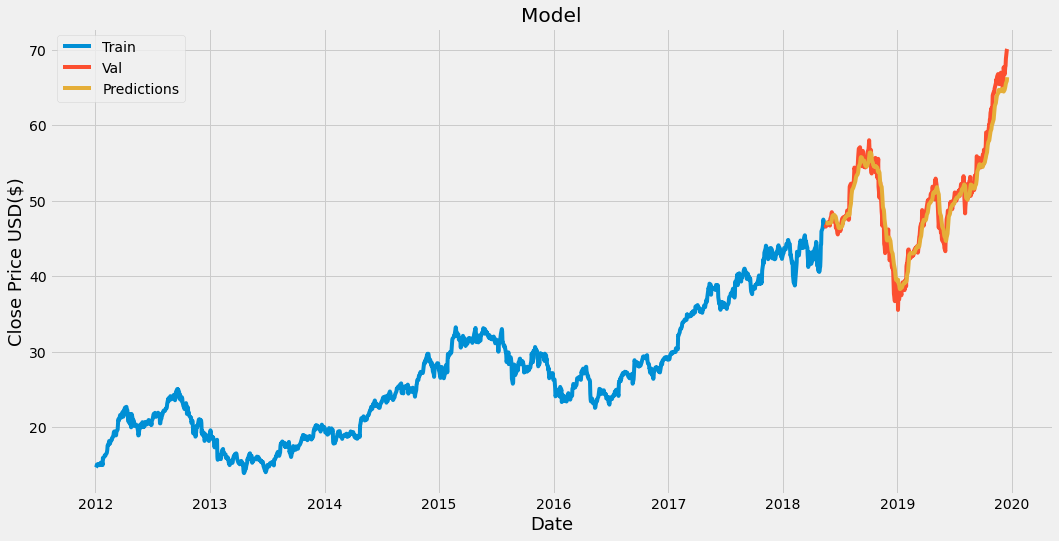

In [ ]:
# plot the data
train=data[:training_data_len:]
valid=data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [ ]:
# show the valid and predictied price
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.115124
2018-05-18,46.577499,47.116501
2018-05-21,46.907501,47.058697
2018-05-22,46.790001,47.023083
2018-05-23,47.090000,46.986439
...,...,...
2019-12-11,67.692497,65.047134
2019-12-12,67.864998,65.285675
2019-12-13,68.787498,65.533684


In [ ]:
# predict for dec 18 2019
apple_quote = web.DataReader('AAPL',data_source='yahoo',start = '2012-01-01',end='2019-12-17')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convertthe data frame to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)#we dont use fit_transform as we have the same minmax as above

# Empty list
X_test=[]
# append the last 60 days
X_test.append(last_60_days_scaled)

# convert the x_test to an numpy array
X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get the predicted Scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 33ms/step
[[66.85156]]


In [ ]:
# predict for dec 18 2019
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start = '2019-12-18',end='2019-12-18')
apple_quote2['Close']

Date
2019-12-18    69.934998
Name: Close, dtype: float64

In [ ]:
error_per =(abs(apple_quote2['Close']-pred_price[0])/apple_quote2['Close'])*100
accuracy = 100-error_per
print(accuracy)

Date
2019-12-18    95.590999
Name: Close, dtype: float64


You will need to use for loop on the last cell he made for predicting next day value. The for loop will help to execute same lines of code for how many days you want to predict in future.